In [ ]:
from textblob import TextBlob

In [ ]:
textblob1 = TextBlob("Food is Great")

In [ ]:
textblob1.sentiment

Sentiment(polarity=0.8, subjectivity=0.75)

In [ ]:
textblob2 = TextBlob("Food is OK")
textblob2.sentiment


Sentiment(polarity=0.5, subjectivity=0.5)

In [ ]:
textblob2 = TextBlob("Please have food")
textblob2.sentiment

Sentiment(polarity=0.0, subjectivity=0.0)

In [ ]:
textblob2 = TextBlob("Movie is Flop")
textblob2.sentiment

Sentiment(polarity=0.0, subjectivity=0.0)

In [ ]:
textblob2 = TextBlob("Movie is Blockbuster")
textblob2.sentiment

Sentiment(polarity=0.0, subjectivity=0.0)

In [ ]:
textblob2 = TextBlob("Food is very bad")
textblob2.sentiment

Sentiment(polarity=-0.9099999999999998, subjectivity=0.8666666666666667)

In [ ]:
from wordcloud import WordCloud

In [ ]:
txt = "Testing the Multilayer Perceptron (MLP) model reveals the intricate dynamics of deep learning, showcasing its ability to capture complex patterns. The model’s performance, driven by backpropagation and activation functions, highlights the importance of tuning parameters. MLP testing underscores the power of neural networks in predictive accuracy."

In [ ]:
img = WordCloud().generate(txt)

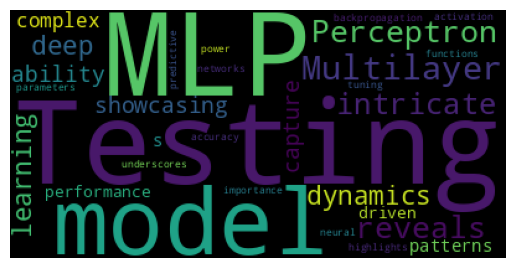

In [ ]:
import matplotlib.pyplot as plt
plt.imshow(img)
plt.axis("off")
plt.show()

In [1]:
import pandas as pd
df = pd.read_csv("sentiment_analysis_data.csv")

In [2]:
df.head()

,Sentence,Sentiment
0,The GeoSolutions technology will leverage Bene...,positive
1,"$ESI on lows, down $1.50 to $2.50 BK a real po...",negative
2,"For the last quarter of 2010 , Componenta 's n...",positive
3,According to the Finnish-Russian Chamber of Co...,neutral
4,The Swedish buyout firm has sold its remaining...,neutral


In [3]:
df.shape

(5842, 2)

In [4]:
X = df["Sentence"]
y = df["Sentiment"]

In [5]:
y.unique()

array(['positive', 'negative', 'neutral'], dtype=object)

In [6]:
y.value_counts()

,count
Sentiment,
neutral,3130
positive,1852
negative,860


<Axes: xlabel='count', ylabel='Sentiment'>

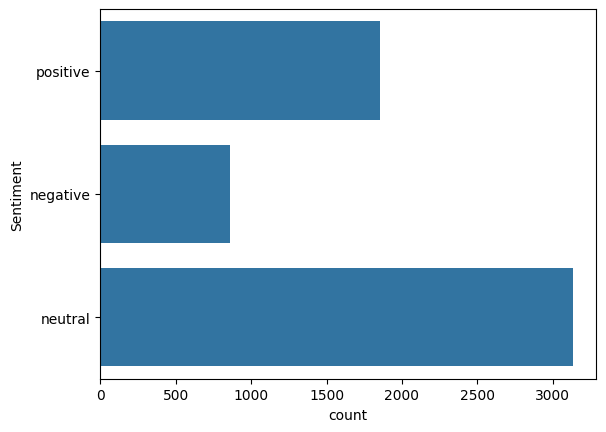

In [7]:
import seaborn as sns
sns.countplot(y)

In [13]:
pos_sentiments = df.query("Sentiment == 'positive'")

In [14]:
pos_sentences = pos_sentiments['Sentence']

In [18]:
# prompt: pos_sentences series to string

pos_sentences_string = " ".join(pos_sentences)
print(pos_sentences_string)


The GeoSolutions technology will leverage Benefon 's GPS solutions by providing Location Based Search Technology , a Communities Platform , location relevant multimedia content and a new and powerful commercial model . For the last quarter of 2010 , Componenta 's net sales doubled to EUR131m from EUR76m for the same period a year earlier , while it moved to a zero pre-tax profit from a pre-tax loss of EUR7m . $SPY wouldn't be surprised to see a green close Kone 's net sales rose by some 14 % year-on-year in the first nine months of 2008 . Circulation revenue has increased by 5 % in Finland and 4 % in Sweden in 2008 . The subdivision made sales revenues last year of EUR 480.7 million EUR 414.9 million in 2008 , and operating profits of EUR 44.5 million EUR 7.4 million . $FB gone green on day $MSFT SQL Server revenue grew double-digit with SQL Server Premium revenue growing over 30% http://stks.co/ir2F Aviva, Friends Life top forecasts ahead of 5.6 billion pound merger Shire CEO steps up

In [16]:
from wordcloud import WordCloud
img = WordCloud().generate(" ".join(pos_sentences))


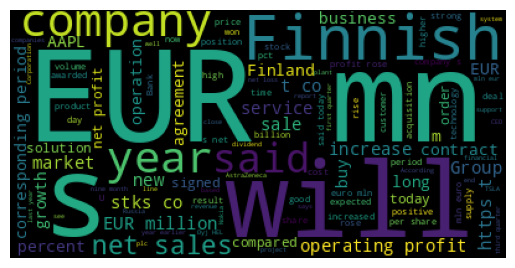

In [17]:
from matplotlib import pyplot as plt
plt.imshow(img)
plt.axis("off")
plt.show()

In [19]:
neg_sentiments = df.query("Sentiment == 'negative'")

In [20]:
neg_sentences = neg_sentiments['Sentence']

In [21]:
neg_img = WordCloud().generate(" ".join(neg_sentences))

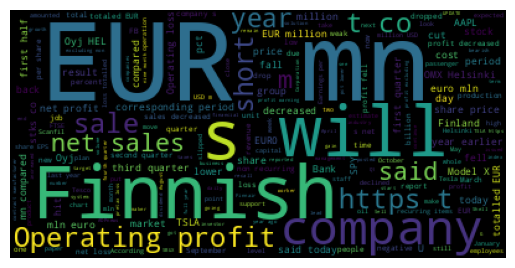

In [22]:
from matplotlib import pyplot as plt
plt.imshow(neg_img)
plt.axis("off")
plt.show()

In [23]:
ntrl_sentiments = df.query("Sentiment == 'neutral'")

In [24]:
ntrl_sentences = ntrl_sentiments['Sentence']

In [25]:
ntrl_img = WordCloud().generate(" ".join(ntrl_sentences))

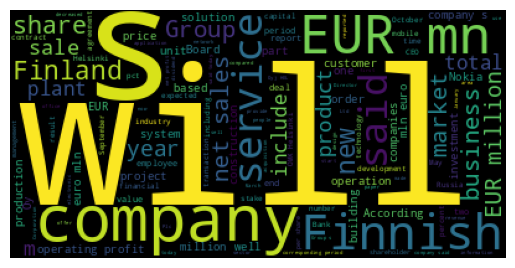

In [26]:
from matplotlib import pyplot as plt
plt.imshow(ntrl_img)
plt.axis("off")
plt.show()

In [30]:
from sklearn.feature_extraction.text import CountVectorizer
count_vectorizer = CountVectorizer(stop_words='english')

In [31]:
vectorized_X = count_vectorizer.fit_transform(X)

In [32]:
vectorized_X.shape

(5842, 11126)

In [33]:
feature_names = count_vectorizer.get_feature_names_out()

In [35]:
vocabulary = count_vectorizer.vocabulary_

In [36]:
type(vocabulary)

dict

In [38]:
# prompt: At which position the word 'netflix' is present in the vocabulary?

vocabulary['netflix']


6882

In [40]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(vectorized_X, y, test_size=0.25, random_state=5)

In [41]:
y_test.value_counts()

,count
Sentiment,
neutral,771
positive,472
negative,218


In [42]:
from sklearn.naive_bayes import MultinomialNB
model = MultinomialNB()
model.fit(X_train, y_train)

MultinomialNB()

In [43]:
model.score(X_train, y_train)

0.8557406984706688

In [44]:
model.score(X_test, y_test)

0.6878850102669405

In [45]:
from sklearn.metrics import confusion_matrix
y_pred = model.predict(X_test)
cm = confusion_matrix(y_test, y_pred)

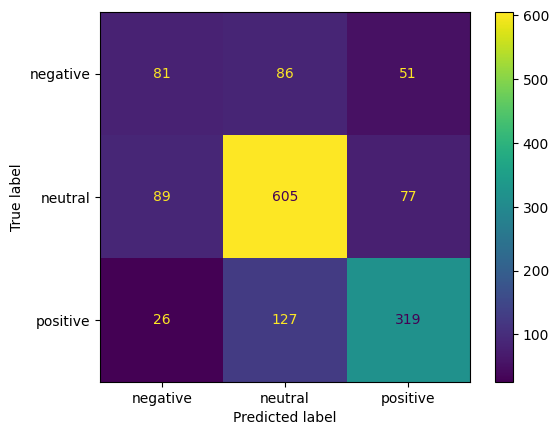

In [46]:
from sklearn.metrics import ConfusionMatrixDisplay
disp = ConfusionMatrixDisplay(confusion_matrix=cm, display_labels=model.classes_)
disp.plot()

In [50]:
test_sentence = "The compnay XYZ did not perform well in the first quarter. Its sales have been declining."
vect_test_sentence = count_vectorizer.transform([test_sentence])
model.predict(vect_test_sentence)

array(['neutral'], dtype='<U8')

In [51]:
test_sentence = "The growth rate of the company has been positive. Its shares price is also increasing. Customers like the companys policies"
vect_test_sentence = count_vectorizer.transform([test_sentence])
model.predict(vect_test_sentence)

array(['positive'], dtype='<U8')